In [2]:
import msprime
import itertools
import random
import math
from IPython.display import SVG

In [52]:
length = 10
recomb_map = msprime.RecombinationMap.uniform_map(length, 0.2, num_loci=length)
ts = msprime.simulate(30, recombination_map=recomb_map)

In [53]:
[b for b in ts.breakpoints()]

[0.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]

In [54]:
mutated_ts = msprime.mutate(ts, rate=1)

In [55]:
print(mutated_ts.tables.sites)
print(mutated_ts.tables.mutations)
print(mutated_ts.tables.edges)

id	position	ancestral_state	metadata
0	0.05801329	0	
1	0.06714588	0	
2	0.16531081	0	
3	0.21763115	0	
4	0.25991666	0	
5	0.26107457	0	
6	0.36326584	0	
7	0.37204181	0	
8	0.39764086	0	
9	0.48368066	0	
10	0.54264355	0	
11	0.77594873	0	
12	0.79105384	0	
13	0.79206110	0	
14	0.86352153	0	
15	0.89086091	0	
16	0.89224420	0	
17	0.97591172	0	
18	0.97713942	0	
19	1.03777808	0	
20	1.13707595	0	
21	1.17930265	0	
22	1.21933278	0	
23	1.22318527	0	
24	1.23400759	0	
25	1.29194039	0	
26	1.48175158	0	
27	1.49162675	0	
28	1.51642819	0	
29	1.55957594	0	
30	1.58459974	0	
31	1.58505906	0	
32	1.73331034	0	
33	1.77605332	0	
34	1.80213628	0	
35	1.81178235	0	
36	1.84192071	0	
37	1.88926798	0	
38	1.99684566	0	
39	2.02177713	0	
40	2.04212697	0	
41	2.04506472	0	
42	2.06759480	0	
43	2.08026518	0	
44	2.09694163	0	
45	2.11761695	0	
46	2.13736686	0	
47	2.18880867	0	
48	2.33966732	0	
49	2.35503783	0	
50	2.44049377	0	
51	2.47338610	0	
52	2.54716858	0	
53	2.55582581	0	
54	2.56243056	0	
55	2.66462821	0	
56	2.70527515	0	
57	2

In [56]:
tables = mutated_ts.dump_tables()

In [57]:
tables.sites.clear()
tables.mutations.clear()

In [58]:
states = ['a','t','g','c']
random.choice(states)

'g'

In [60]:
print(mutated_ts.tables.edges)

id	left		right		parent	child
0	0.00000000	10.00000000	30	1
1	0.00000000	10.00000000	30	29
2	0.00000000	10.00000000	31	11
3	0.00000000	10.00000000	31	23
4	0.00000000	10.00000000	32	5
5	0.00000000	10.00000000	32	9
6	0.00000000	10.00000000	33	8
7	0.00000000	10.00000000	33	27
8	0.00000000	5.00000000	34	4
9	0.00000000	5.00000000	34	30
10	0.00000000	10.00000000	35	12
11	0.00000000	10.00000000	35	32
12	0.00000000	10.00000000	36	7
13	0.00000000	10.00000000	36	33
14	0.00000000	10.00000000	37	10
15	0.00000000	10.00000000	37	18
16	0.00000000	10.00000000	38	2
17	0.00000000	10.00000000	38	13
18	0.00000000	10.00000000	39	26
19	0.00000000	10.00000000	39	36
20	4.00000000	8.00000000	40	3
21	4.00000000	8.00000000	40	35
22	0.00000000	10.00000000	41	15
23	0.00000000	10.00000000	41	39
24	0.00000000	10.00000000	42	16
25	0.00000000	10.00000000	42	25
26	0.00000000	10.00000000	43	28
27	0.00000000	10.00000000	43	31
28	5.00000000	10.00000000	44	4
29	0.00000000	4.00000000	44	35
30	0.00000000	4.00000000	44	41
31	5

In [61]:
for k, g in itertools.groupby(mutated_ts.sites(), lambda x: math.floor(x.position)):
  print("Sites at position {}".format(k))
  site_id = tables.sites.add_row(k, random.choice(states))
  mutations = []
  for site in g:
    print(k)
    tree = mutated_ts.at_index(k)
    mutations.extend(site.mutations)
  mutations.sort(key = lambda x: mutated_ts.node(x.node).time, reverse=True)
  print("\n --> ".join(["{}: {}".format(mutated_ts.node(m.node).time, m) for m in mutations]))
    
  for m in mutations:
    tables.mutations.add_row(site_id, m.node, random.choice(states), parent=-1)
    #print('row added')
    

Sites at position 0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1.392225559547574: {'id': 0, 'site': 0, 'node': 70, 'derived_state': '1', 'parent': -1, 'metadata': b''}
 --> 1.392225559547574: {'id': 3, 'site': 3, 'node': 70, 'derived_state': '1', 'parent': -1, 'metadata': b''}
 --> 0.7287382039571609: {'id': 1, 'site': 1, 'node': 67, 'derived_state': '1', 'parent': -1, 'metadata': b''}
 --> 0.7287382039571609: {'id': 7, 'site': 7, 'node': 67, 'derived_state': '1', 'parent': -1, 'metadata': b''}
 --> 0.6726490574391638: {'id': 6, 'site': 6, 'node': 64, 'derived_state': '1', 'parent': -1, 'metadata': b''}
 --> 0.41080466973365376: {'id': 2, 'site': 2, 'node': 56, 'derived_state': '1', 'parent': -1, 'metadata': b''}
 --> 0.41080466973365376: {'id': 8, 'site': 8, 'node': 56, 'derived_state': '1', 'parent': -1, 'metadata': b''}
 --> 0.41080466973365376: {'id': 9, 'site': 9, 'node': 56, 'derived_state': '1', 'parent': -1, 'metadata': b''}
 --> 0.41080466973365376: {'id': 15, 'site': 15, 'node': 5

IndexError: Index out of bounds

In [35]:
print(tables.mutations)

id	site	node	derived_state	parent	metadata
0	0	63	a	-1	
1	0	63	g	-1	
2	0	49	t	-1	
3	0	47	c	-1	
4	0	46	c	-1	
5	0	45	a	-1	
6	0	42	g	-1	
7	0	37	a	-1	
8	0	16	g	-1	
9	0	24	a	-1	
10	0	24	c	-1	
11	0	3	a	-1	
12	0	14	a	-1	
13	0	27	a	-1	
14	1	61	g	-1	
15	1	53	c	-1	
16	1	49	a	-1	
17	1	42	t	-1	
18	1	14	a	-1	
19	1	6	g	-1	
20	2	66	g	-1	
21	2	66	t	-1	
22	2	66	c	-1	
23	2	62	t	-1	
24	2	62	a	-1	
25	2	62	t	-1	
26	2	62	g	-1	
27	2	62	t	-1	
28	2	62	a	-1	
29	2	62	g	-1	
30	2	62	a	-1	
31	2	62	a	-1	
32	2	62	t	-1	
33	2	55	g	-1	
34	2	47	g	-1	
35	2	41	a	-1	
36	2	37	c	-1	
37	2	16	t	-1	
38	2	27	g	-1	
39	2	10	c	-1	
40	2	10	c	-1	
41	2	27	c	-1	
42	3	66	g	-1	
43	3	66	c	-1	
44	3	62	a	-1	
45	3	62	g	-1	
46	3	62	t	-1	
47	3	61	a	-1	
48	3	61	c	-1	
49	3	59	a	-1	
50	3	59	t	-1	
51	3	55	g	-1	
52	3	41	g	-1	
53	3	35	c	-1	
54	3	27	g	-1	
55	3	17	c	-1	
56	3	18	g	-1	
57	3	10	t	-1	
58	3	16	g	-1	
59	4	66	c	-1	
60	4	66	t	-1	
61	4	62	c	-1	
62	4	62	g	-1	
63	4	62	a	-1	
64	4	62	c	-1	
65	4	62	c	-1	
66	4	62	a	-1	
67	4	59	a	-1	
68	4	27	a	-1	
69	

In [26]:
tables.compute_mutation_parents()

In [27]:
print(tables.mutations)

id	site	node	derived_state	parent	metadata
0	0	42	a	-1	
1	0	16	a	-1	
2	0	24	g	-1	
3	0	24	g	2	
4	0	3	t	-1	
5	0	14	a	-1	
6	1	63	g	-1	
7	1	63	g	6	
8	1	49	a	7	
9	1	49	a	8	
10	1	47	a	7	
11	1	46	a	10	
12	1	45	c	7	
13	1	42	a	7	
14	1	37	t	7	
15	1	27	a	-1	
16	1	14	t	11	
17	2	66	c	-1	
18	2	66	t	17	
19	2	62	g	-1	
20	2	62	t	19	
21	2	62	g	20	
22	2	62	a	21	
23	2	62	a	22	
24	2	61	g	18	
25	2	53	a	24	
26	2	41	g	23	
27	2	6	g	25	
28	2	16	a	23	
29	2	27	g	18	
30	2	10	g	23	
31	3	66	a	-1	
32	3	66	c	31	
33	3	66	t	32	
34	3	62	g	-1	
35	3	62	a	34	
36	3	62	c	35	
37	3	62	g	36	
38	3	62	t	37	
39	3	62	c	38	
40	3	62	g	39	
41	3	62	g	40	
42	3	61	a	33	
43	3	61	a	42	
44	3	59	c	41	
45	3	55	a	44	
46	3	55	a	45	
47	3	47	g	44	
48	3	41	t	46	
49	3	37	g	-1	
50	3	35	c	43	
51	3	10	a	47	
52	3	27	g	33	
53	3	27	c	52	
54	3	17	c	44	
55	4	66	c	-1	
56	4	66	t	55	
57	4	62	g	-1	
58	4	62	t	57	
59	4	59	t	58	
60	4	18	c	59	
61	4	10	a	59	
62	4	16	c	58	
63	4	27	g	56	
64	4	1	t	59	
65	4	24	g	56	
66	5	66	c	-1	
67	5	66	c	66	
68	5	62	c	-1	
69	5	62	g	68

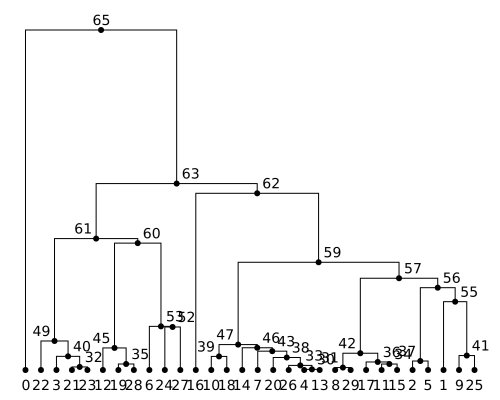

Tree 0 covers [0.00, 1.00); TMRCA = 1.5658
0.014591849893745124


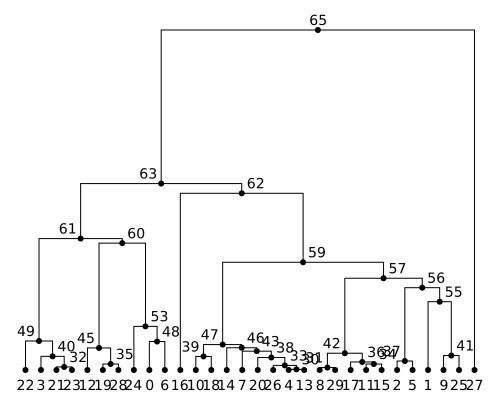

Tree 1 covers [1.00, 2.00); TMRCA = 1.5658
0.014591849893745124


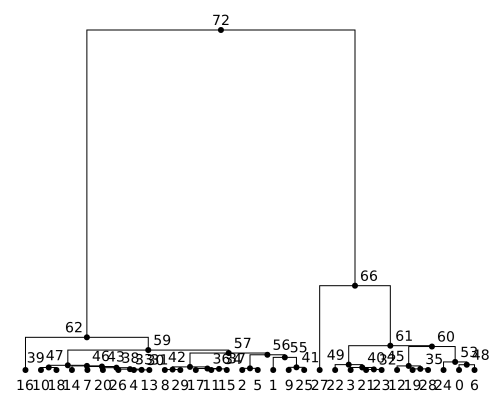

Tree 2 covers [2.00, 3.00); TMRCA = 8.4667
0.014591849893745124


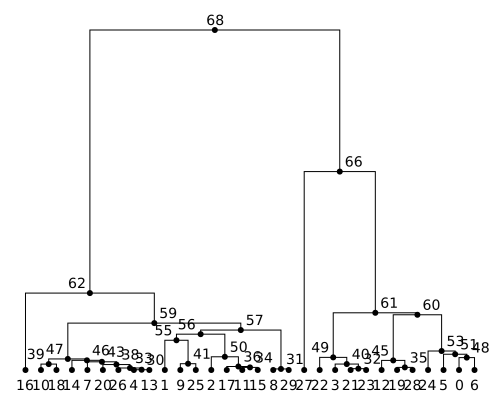

Tree 3 covers [3.00, 5.00); TMRCA = 3.5972
0.014591849893745124


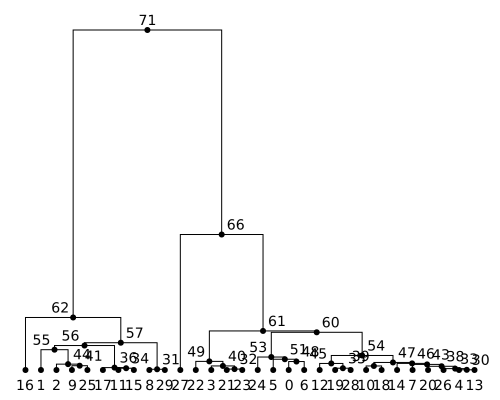

Tree 4 covers [5.00, 6.00); TMRCA = 5.2680
0.014591849893745124


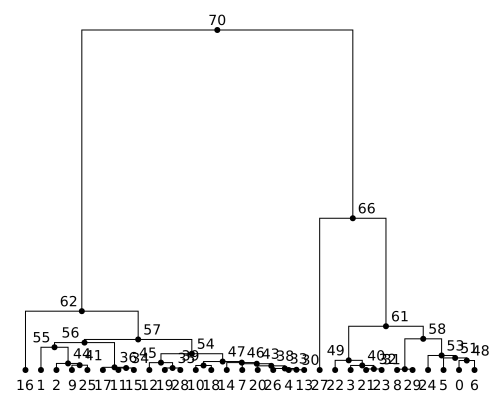

Tree 5 covers [6.00, 7.00); TMRCA = 4.7037
0.014591849893745124


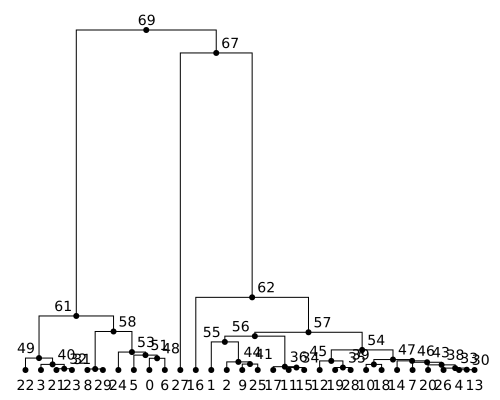

Tree 6 covers [7.00, 8.00); TMRCA = 3.8078
0.014591849893745124


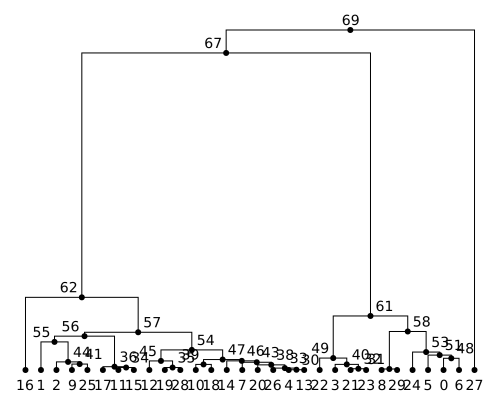

Tree 7 covers [8.00, 9.00); TMRCA = 3.8078
0.014591849893745124


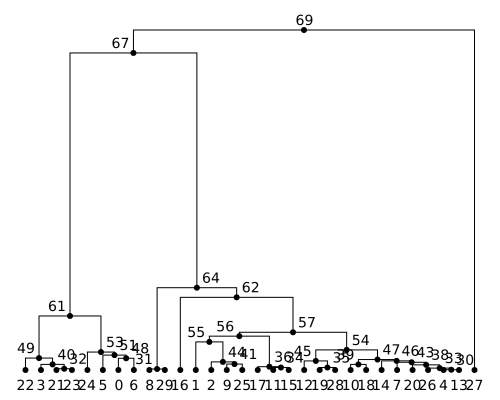

Tree 8 covers [9.00, 10.00); TMRCA = 3.8078
0.014591849893745124


In [28]:
for tree in ts.trees():
    display(SVG(tree.draw(height=400, width = 500, 
                            tree_height_scale="time")))
    print("Tree {} covers [{:.2f}, {:.2f}); TMRCA = {:.4f}".format(
        tree.index, *tree.interval, tree.time(tree.roots[0])))
    print(tree.branch_length(46))

In [18]:
mutated_ts_trees = tables.tree_sequence()

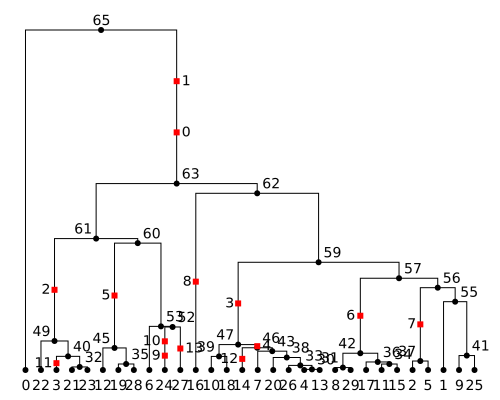

Tree 0 covers [0.00, 1.00); TMRCA = 1.5658
0.014591849893745124


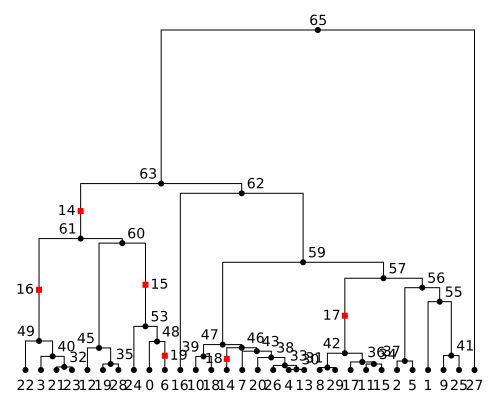

Tree 1 covers [1.00, 2.00); TMRCA = 1.5658
0.014591849893745124


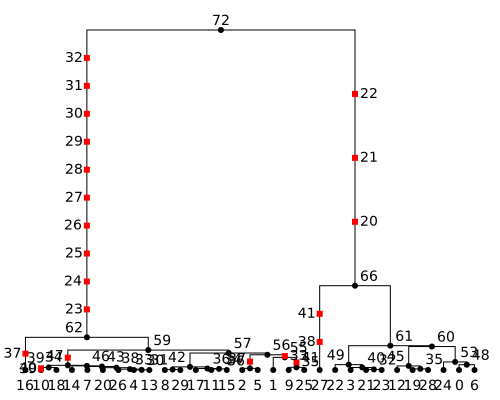

Tree 2 covers [2.00, 3.00); TMRCA = 8.4667
0.014591849893745124


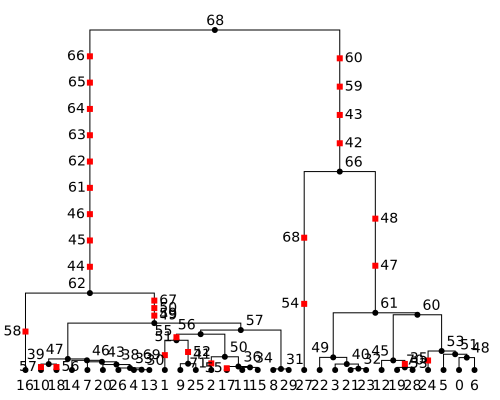

Tree 3 covers [3.00, 5.00); TMRCA = 3.5972
0.014591849893745124


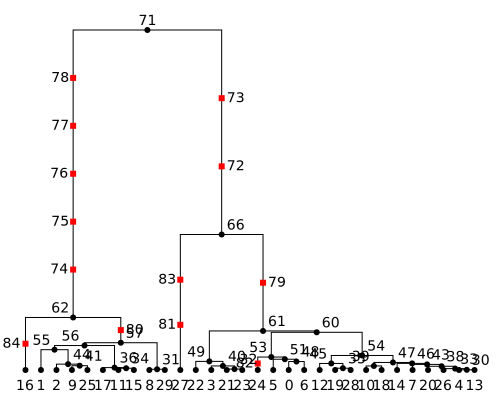

Tree 4 covers [5.00, 6.00); TMRCA = 5.2680
0.014591849893745124


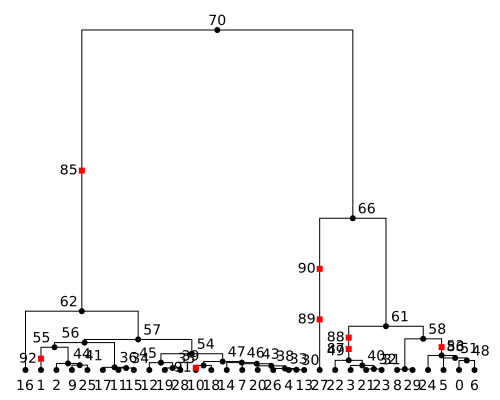

Tree 5 covers [6.00, 7.00); TMRCA = 4.7037
0.014591849893745124


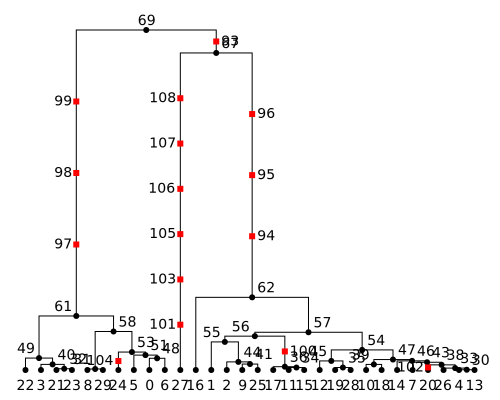

Tree 6 covers [7.00, 8.00); TMRCA = 3.8078
0.014591849893745124


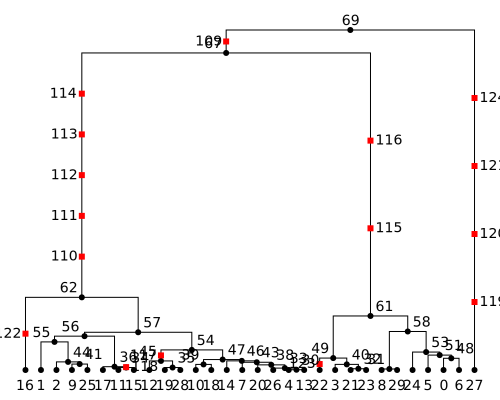

Tree 7 covers [8.00, 9.00); TMRCA = 3.8078
0.014591849893745124


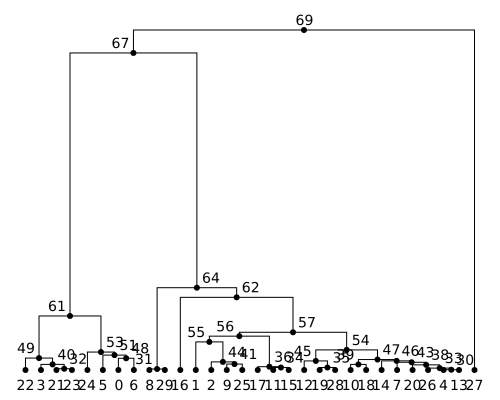

Tree 8 covers [9.00, 10.00); TMRCA = 3.8078
0.014591849893745124


In [19]:
for tree in mutated_ts_trees.trees():
    display(SVG(tree.draw(height=400, width = 500, 
                            tree_height_scale="time")))
    print("Tree {} covers [{:.2f}, {:.2f}); TMRCA = {:.4f}".format(
        tree.index, *tree.interval, tree.time(tree.roots[0])))
    print(tree.branch_length(46))

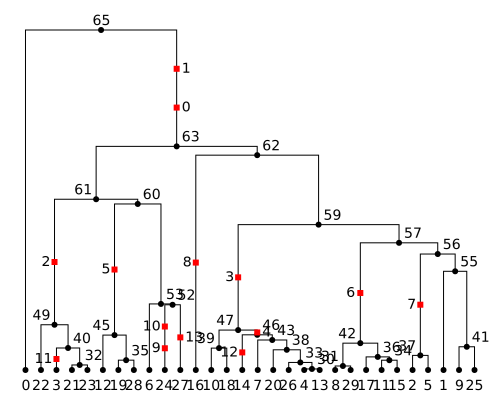

Tree 0 covers [0.00, 1.00); TMRCA = 1.5658
0.014591849893745124


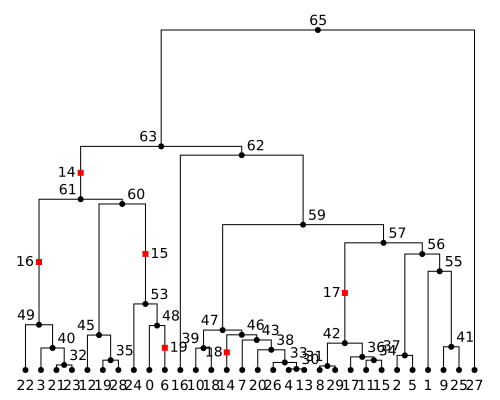

Tree 1 covers [1.00, 2.00); TMRCA = 1.5658
0.014591849893745124


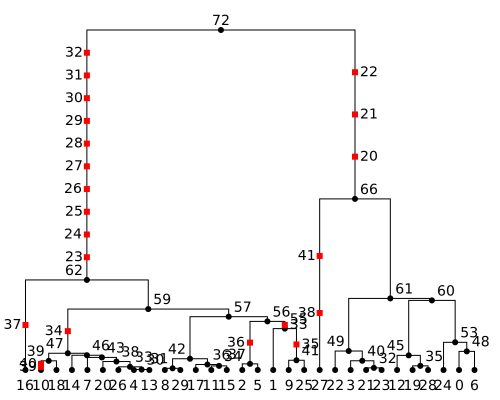

Tree 2 covers [2.00, 3.00); TMRCA = 8.4667
0.014591849893745124


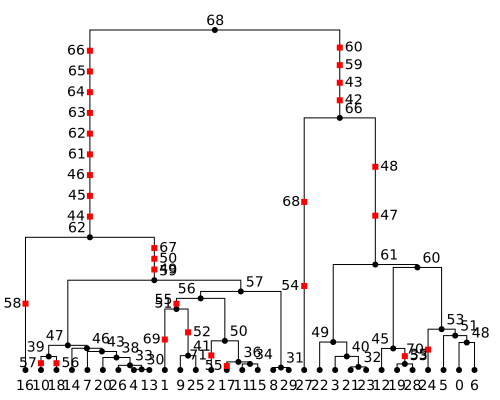

Tree 3 covers [3.00, 5.00); TMRCA = 3.5972
0.014591849893745124


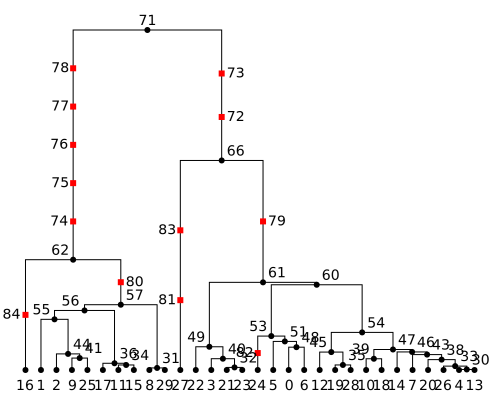

Tree 4 covers [5.00, 6.00); TMRCA = 5.2680
0.014591849893745124


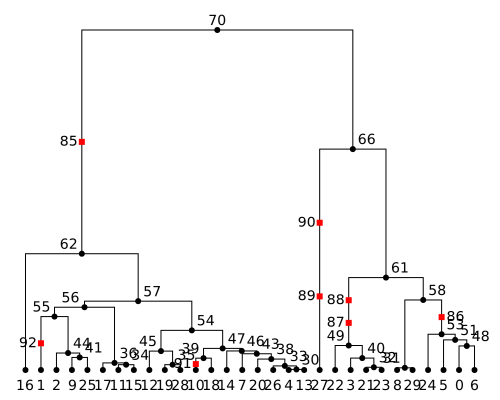

Tree 5 covers [6.00, 7.00); TMRCA = 4.7037
0.014591849893745124


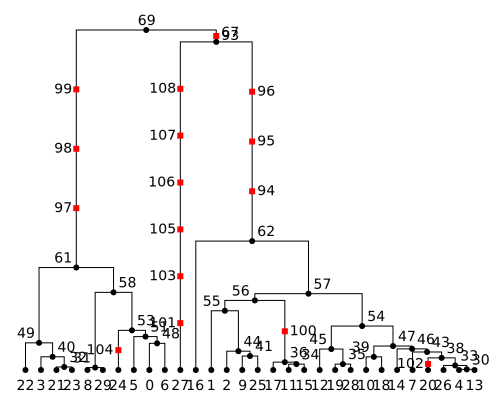

Tree 6 covers [7.00, 8.00); TMRCA = 3.8078
0.014591849893745124


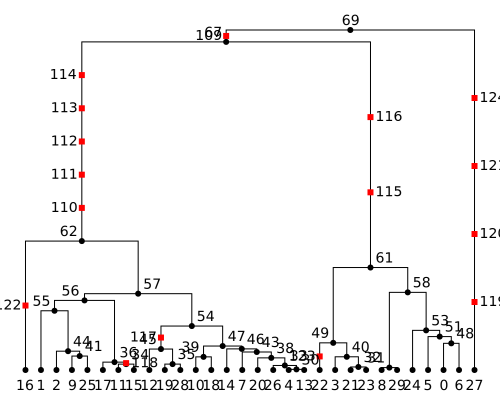

Tree 7 covers [8.00, 9.00); TMRCA = 3.8078
0.014591849893745124


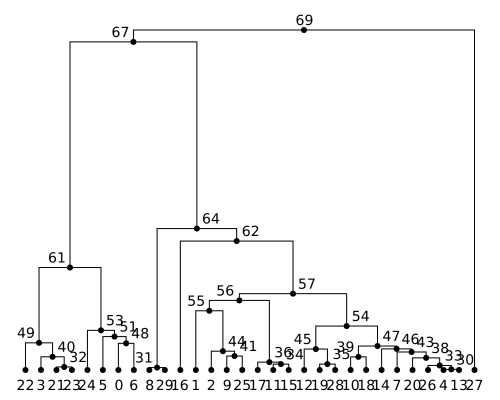

Tree 8 covers [9.00, 10.00); TMRCA = 3.8078
0.014591849893745124


In [20]:
for tree in mutated_ts_trees.trees():
    display(SVG(tree.draw(height=400, width = 500, 
                            tree_height_scale="log_time")))
    print("Tree {} covers [{:.2f}, {:.2f}); TMRCA = {:.4f}".format(
        tree.index, *tree.interval, tree.time(tree.roots[0])))
    print(tree.branch_length(46))